# Data Base management (Db)

<!-- SUMMARY: Management of the Data Base internal to gstlearn Library (Db)  -->

<!-- CATEGORY: Data_Base_Management -->

## Import packages

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc

gdoc.setNoScroll()

<IPython.core.display.Javascript object>

Global variables

In [2]:
gl.OptCst.define(gl.ECst.NTCOL,6)
gl.law_set_random_seed(13414)

## Defining a Data set

The data is defined by simulating samples at random within a given box. This study is performed in 2-D but this is not considered as a limitation.

In [3]:
nech = 500
mydb = gl.Db.createFromBox(nech, [0,0], [100, 100])
mydb


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 3
Total number of samples      = 500

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x-1 - Locator = x1
Column = 2 - Name = x-2 - Locator = x2

Displaying the Data set

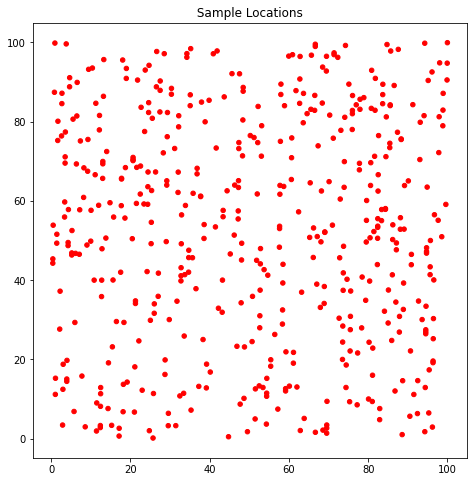

In [4]:
ax = mydb.plot()

We now define a vector of 0-1 integer values at random again, according to a Bernoulli distribution with a probability of 0.2. This vector is added to the Data Base.

In [5]:
sel = gl.VectorHelper.simulateBernoulli(nech, 0.2)
gl.VectorHelper.displayStats("Statistics on the Selection vector",sel)
iuid = mydb.addColumns(sel,"sel")

Statistics on the Selection vector
- Number of samples = 500 / 500
- Minimum  =      0.000
- Maximum  =      1.000
- Mean     =      0.186
- St. Dev. =      0.389


In [6]:
dbfmt = gl.DbStringFormat.createFromFlags(flag_stats=True, names=["sel"])
mydb.display(dbfmt)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 4
Total number of samples      = 500

Data Base Statistics
--------------------
4 - Name sel - Locator NA
 Nb of data          =        500
 Nb of active values =        500
 Minimum value       =      0.000
 Maximum value       =      1.000
 Mean value          =      0.186
 Standard Deviation  =      0.389
 Variance            =      0.151

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x-1 - Locator = x1
Column = 2 - Name = x-2 - Locator = x2
Column = 3 - Name = sel - Locator = NA


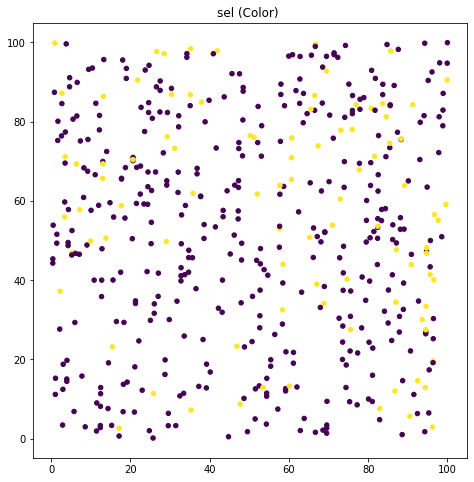

In [7]:
ax = mydb.plot(nameColor="sel")

## Extracting a new Data Base upon ranks

We demonstrate the possibility to extract a Data Base by specifying the selected ranks of an Input Data Base.

In [8]:
ranks = gl.VectorHelper.sampleRanks(mydb.getSampleNumber(), proportion=0.2)
print("Number of selected samples =", len(ranks))

Number of selected samples = 100


In [9]:
mydbred1 = gl.Db.createReduce(mydb, ranks=ranks)

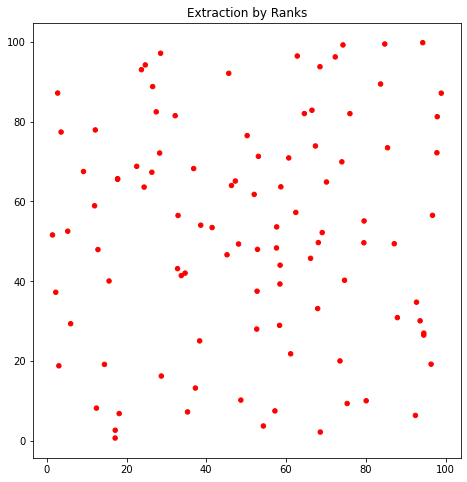

In [10]:
ax = mydbred1.plot()
ax.decoration(title="Extraction by Ranks")

## Extracting a new Data Base upon selection

We now create turn the variable 'sel' into a selection and createa new data set which is restricted to the only active samples

In [11]:
mydb.setLocator('sel', gl.ELoc.SEL)
mydbred2 = gl.Db.createReduce(mydb)
mydbred2


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 4
Total number of samples      = 93
Number of active samples     = 93

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x-1 - Locator = x1
Column = 2 - Name = x-2 - Locator = x2
Column = 3 - Name = sel - Locator = sel

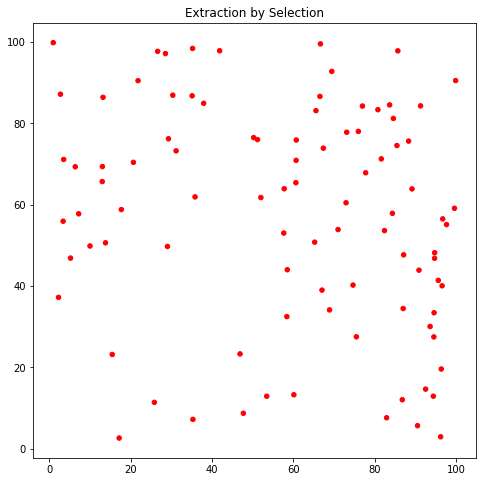

In [12]:
ax = mydbred2.plot()
ax.decoration(title="Extraction by Selection")

# Defining a Line Data set

The data is defined in 2-D as a set of lines at random. The number of lines is provided. Each line contains a number of samples drawn at random.

In [13]:
mydb = gl.DbLine.createFillRandom(ndim=2, nbline=10, nperline=30, delta=[1,-1])

Understanding the contents of the DbLine file created randomly

In [14]:
mydb.display()


Data Base Line Characteristics
Number of Lines = 10
Line length = 24 / 29 / 30 / 26 / 26 / 22 / 23 / 35 / 23 / 36

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x-1 - Locator = x1
Column = 2 - Name = x-2 - Locator = x2


Displaying the Line Data set

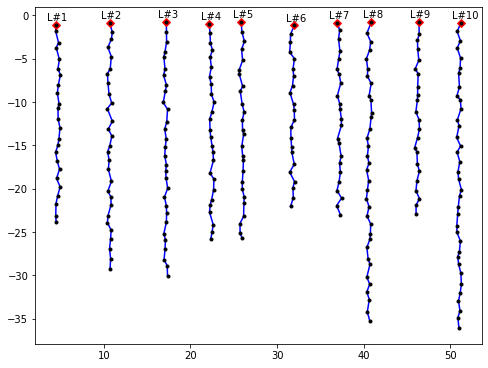

In [15]:
ax = mydb.plot(flagSample=True, flagAnnotateHeader=True)

# Defining an Oriented Graph Data Set

The data is defined in 2-D as a set of samples which are joined by arcs in order to form a Graph.

In [16]:
x1  = np.array([ 0., 1., 2., 3., 4., 5., 6., 2., 3., 4., 5., 6., 7., 3., 4., 2., 3., 4., 0., 5., 7.])
x2  = np.array([ 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 2., 2., 3., 3., 3., 4., 5., 4.])
z1  = np.array([1.2,2.5,3.6,1.4,0.3,0.2,8.2,0.3,3.2,1.2,0.4,0.1,0.3,3.2,4.5,1.2,5.2,1.2,1.1,2.2,3.3])
tab = np.concatenate((x1, x2, z1))
nech = len(x1)

arcs = gl.MatrixSparse(nech,nech)
arcs.setValue( 0, 1, gl.law_uniform());
arcs.setValue( 1, 2, gl.law_uniform());
arcs.setValue( 2, 3, gl.law_uniform());
arcs.setValue( 3, 4, gl.law_uniform());
arcs.setValue( 4, 5, gl.law_uniform());
arcs.setValue( 5, 6, gl.law_uniform());
arcs.setValue( 2, 7, gl.law_uniform());
arcs.setValue( 7, 8, gl.law_uniform());
arcs.setValue( 8, 9, gl.law_uniform());
arcs.setValue( 9,10, gl.law_uniform());
arcs.setValue(10,11, gl.law_uniform());
arcs.setValue(11,12, gl.law_uniform());
arcs.setValue( 8,13, gl.law_uniform());
arcs.setValue(13,14, gl.law_uniform());
arcs.setValue(14,11, gl.law_uniform());
arcs.setValue( 7,15, gl.law_uniform());
arcs.setValue(15,16, gl.law_uniform());
arcs.setValue(16,17, gl.law_uniform());

dbgraphO = gl.DbGraphO.createFromMatrix(nech, gl.ELoadBy.COLUMN, tab, arcs,
                                        ["x1", "x2", "z1"], ["x1", "x2", "z1"])

Forcing dimension to nech=21


In [17]:
gl.OptCst.define(gl.ECst.NTROW,-1)
gl.OptCst.define(gl.ECst.NTCOL,-1)
dbgraphO.display()


Data Base Oriented Graph Characteristics

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x1 - Locator = x1
Column = 2 - Name = x2 - Locator = x2
Column = 3 - Name = z1 - Locator = z1

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 4
Total number of samples      = 21
- Number of rows    = 21
- Number of columns = 21
- Sparse Format
               [,  0]    [,  1]    [,  2]    [,  3]    [,  4]    [,  5]    [,  6]
     [  0,]         .     0.066         .         .         .         .         .
     [  1,]         .         .     0.956         .         .         .         .
     [  2,]         .         .         .     0.423         .         .         .
     [  3,]         .         .         .         .     0.420         .         .
     [  4,]         .         .         .         .         .     0.064         .
     [  5,]         .         .         . 

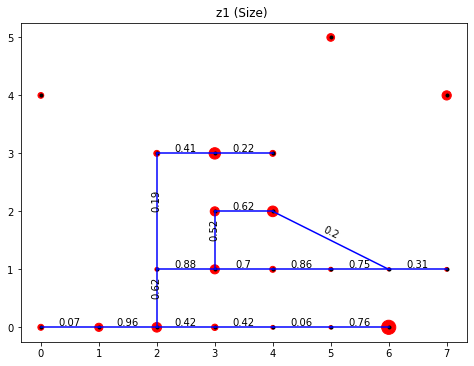

In [18]:
ax = dbgraphO.plot(flagSample=True, flagAnnotate=True)
ax = dbgraphO.point(nameSize="z1")